Start of Appendix

Start of Question 3

In [66]:
pip install --upgrade pip

In [67]:
pip install scikit-learn scipy numpy matplotlib -verbose

Using pip 23.3.2 from f:\Anaconda\Lib\site-packages\pip (python 3.11)
Note: you may need to restart the kernel to use updated packages.


ERROR: rbose is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with bzr+http, bzr+https, bzr+ssh, bzr+sftp, bzr+ftp, bzr+lp, bzr+file, git+http, git+https, git+ssh, git+git, git+file, hg+file, hg+http, hg+https, hg+ssh, hg+static-http, svn+ssh, svn+http, svn+https, svn+svn, svn+file).


In [25]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

mnistData = np.load(f"../data/mnist-data.npz")
print("\nloaded %s data!" % "minst")
fields = "test_data", "training_data", "training_labels"
for field in fields:
    print(field, mnistData[field].shape)
mnistTest = mnistData["test_data"]
mnistAllData = mnistData["training_data"]
mnistAllLabels = mnistData["training_labels"]

spamData = np.load(f"../data/spam-data.npz")
print("\nloaded %s data!" % "spam")
fields = "test_data", "training_data", "training_labels"
for field in fields:
    print(field, spamData[field].shape)
spamTest = spamData["test_data"]
spamAllData = spamData["training_data"]
spamAllLabels = spamData["training_labels"]

print(spamAllLabels)


loaded minst data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 54)
training_data (4171, 54)
training_labels (4171,)
[1 1 1 ... 0 0 0]


In [26]:
#Test out permutation function
#Seeding rng
rng = np.random.default_rng(seed=888)
a = np.array([1,2,3,4])
b = np.array([4,3,2,1])

indexes = np.arange(len(a))
rng.shuffle(indexes)
print(indexes)

a = a[indexes]
b = b[indexes]

print(a, b)

[1 0 3 2]
[2 1 4 3] [3 4 1 2]


In [27]:
rng = np.random.default_rng(seed=888)

#Shuffle Datasets
randIndex = rng.permutation(len(mnistAllLabels))

# #Pre-shuffled value
# print("\n Pre-shuffled value \n")
# print(mnistAllData[0])
# print(mnistAllLabels[0])

# print("\n Pre-shuffled value on index\n")
# print(mnistAllData[randIndex[0]])
# print(mnistAllLabels[randIndex[0]])

#ShuffleValues
mnistAllLabels = mnistAllLabels[randIndex]
mnistAllData = mnistAllData[randIndex]

# #Post-shuffled values should still align
# print("\n Post-shuffled value \n")
# print(mnistAllData[0])
# print(mnistAllLabels[0])

randIndex = rng.permutation(len(spamAllLabels))
spamAllLabels = spamAllLabels[randIndex]
spamAllData = spamAllData[randIndex]

In [28]:
#Partition Array
mnistValLabels = mnistAllLabels[0:10000]
mnistValData = mnistAllData[0:10000]

mnistTrainLabels = mnistAllLabels[10000:]
mnistTrainData = mnistAllData[10000:]

spamSplit = round(len(spamAllData) * 0.2)
print(spamSplit)
spamValLabels = spamAllLabels[0:spamSplit]
spamValData = spamAllData[0:spamSplit]

spamTrainLabels = spamAllLabels[spamSplit:]
spamTrainData = spamAllData[spamSplit:]

print(len(mnistTrainData), len(mnistValData))
print(len(mnistTrainLabels), len(mnistValLabels))

print(len(spamTrainData), len(spamValData))
print(len(spamTrainLabels), len(spamValLabels))

834
50000 10000
50000 10000
3337 834
3337 834


In [29]:
#Classification Accuracy
def classAccuracy(predictionList, truthList):
    score = 0
    for (pred, truth) in zip(predictionList, truthList):
        if pred == truth:
            score += 1
    return score/len(predictionList)


Start of Question 4

In [22]:
#Create Classifier
minstClf = svm.SVC(kernel="linear")

#Flatten minst
# print("Original Data")
# print(mnistTrainData.shape)
# print(mnistTrainData[0])

minstTrainFlat = np.reshape(mnistTrainData, (50000, 784))
minstValFlat = np.reshape(mnistValData, (10000, 784))

# print("Flattened Data")
# print(minstFlat.shape)
# print(minstFlat[0])
minstValScoreList = []
minstTrainScoreList = []

#Fit points
minstTrainingPoints = [100, 200, 500, 1000, 2000, 5000, 10000]
for numPoints in minstTrainingPoints:
    minstClf.fit(minstTrainFlat[0:numPoints], mnistTrainLabels[0:numPoints])

    predictedTraining = minstClf.predict(minstTrainFlat[0:numPoints])
    predictedVal = minstClf.predict(minstValFlat)

    print(f"{numPoints}-dp training data score:", classAccuracy(predictedTraining, mnistTrainLabels[0:numPoints]))
    print(f"{numPoints}-dp validation data score:", classAccuracy(predictedVal, mnistValLabels))
    minstTrainScoreList += [classAccuracy(predictedTraining, mnistTrainLabels[0:numPoints])]
    minstValScoreList += [classAccuracy(predictedVal, mnistValLabels)]


100-dp training data score: 1.0
100-dp validation data score: 0.7306
200-dp training data score: 1.0
200-dp validation data score: 0.8156
500-dp training data score: 1.0
500-dp validation data score: 0.8521
1000-dp training data score: 1.0
1000-dp validation data score: 0.8841
2000-dp training data score: 1.0
2000-dp validation data score: 0.8949
5000-dp training data score: 1.0
5000-dp validation data score: 0.9103
10000-dp training data score: 1.0
10000-dp validation data score: 0.907


In [30]:
#Create Classifier
spamClf = svm.SVC(kernel="linear")

#Flatten spam
print("Original Data")
print(spamTrainData.shape)
print(spamTrainData[10])

# minstTrainFlat = np.reshape(mnistTrainData, (50000, 784))
# minstValFlat = np.reshape(mnistValData, (10000, 784))
# print("Flattened Data")
# print(minstFlat.shape)
# print(minstFlat[0])
#print(spamValLabels)
spamValScoreList = []
spamTrainScoreList = []

#Fit points
spamTrainingPoints = [100, 200, 500, 1000, 2000, 3337]
for numPoints in spamTrainingPoints:
    spamClf.fit(spamTrainData[0:numPoints], spamTrainLabels[0:numPoints])

    predictedTraining = spamClf.predict(spamTrainData[0:numPoints])
    predictedVal = spamClf.predict(spamValData)

    print(f"{numPoints}-dp training data score:", classAccuracy(predictedTraining, spamTrainLabels[0:numPoints]))
    print(f"{numPoints}-dp validation data score:", classAccuracy(predictedVal, spamValLabels))

    spamTrainScoreList += [classAccuracy(predictedTraining, spamTrainLabels[0:numPoints])]
    spamValScoreList += [classAccuracy(predictedVal, spamValLabels)]

Original Data
(3337, 32)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0.]
100-dp training data score: 0.85
100-dp validation data score: 0.7865707434052758
200-dp training data score: 0.835
200-dp validation data score: 0.7889688249400479
500-dp training data score: 0.806
500-dp validation data score: 0.8117505995203836
1000-dp training data score: 0.794
1000-dp validation data score: 0.7925659472422062
2000-dp training data score: 0.811
2000-dp validation data score: 0.7925659472422062
3337-dp training data score: 0.807611627210069
3337-dp validation data score: 0.802158273381295


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


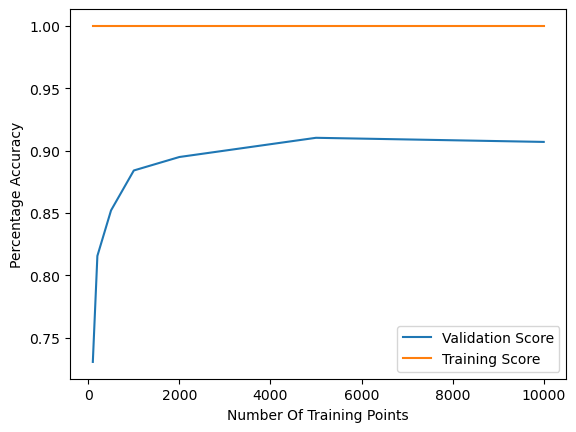

In [24]:
# print(minstScoreList)
# print(spamScoreList)
print(minstTrainScoreList)

plt.plot(minstTrainingPoints, minstValScoreList, label = "Validation Score")
plt.plot(minstTrainingPoints, minstTrainScoreList, label = "Training Score")
plt.legend(loc='lower right')
plt.xlabel("Number Of Training Points")
plt.ylabel("Percentage Accuracy")
plt.show()


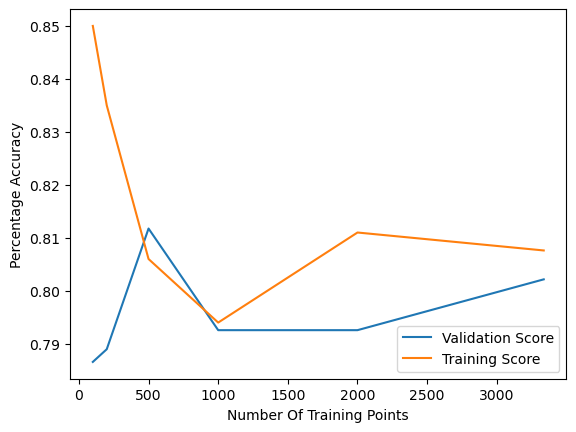

In [31]:
plt.plot(spamTrainingPoints, spamValScoreList, label = "Validation Score")
plt.plot(spamTrainingPoints, spamTrainScoreList, label = "Training Score")
plt.legend(loc='lower right')
plt.xlabel("Number Of Training Points")
plt.ylabel("Percentage Accuracy")
plt.show()


Start of Question 5

1e-10-cVal training data score: 0.1123
1e-10-cVal validation data score: 0.1109
1e-08-cVal training data score: 0.8956
1e-08-cVal validation data score: 0.895
1e-06-cVal training data score: 0.9667
1e-06-cVal validation data score: 0.9259
0.0001-cVal training data score: 1.0
0.0001-cVal validation data score: 0.907
1-cVal training data score: 1.0
1-cVal validation data score: 0.907
100-cVal training data score: 1.0
100-cVal validation data score: 0.907
10000-cVal training data score: 1.0
10000-cVal validation data score: 0.907
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


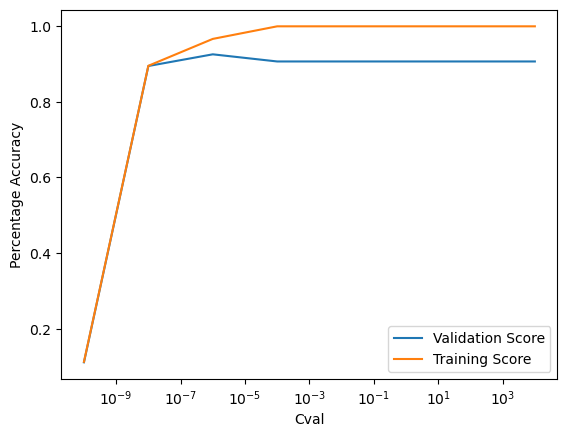

In [49]:
minstTrainFlat = np.reshape(mnistTrainData, (50000, 784))
minstValFlat = np.reshape(mnistValData, (10000, 784))

# print("Flattened Data")
# print(minstFlat.shape)
# print(minstFlat[0])
minstOptValScoreList = []
minstOptTrainScoreList = []

#Fit points
cVal = [1*(10**-10), 1*(10**-8), 1*(10**-6), 1*(10**-4), 1*(10**-2), 1, 1*(10**2), 1*(10**4)]
trainingPoints = 10000
for val in cVal:
    minstClfOptimized = svm.SVC(kernel="linear", C = val)
    minstClfOptimized.fit(minstTrainFlat[0:trainingPoints], mnistTrainLabels[0:trainingPoints])

    predictedTraining = minstClfOptimized.predict(minstTrainFlat[0:trainingPoints])
    predictedVal = minstClfOptimized.predict(minstValFlat)

    print(f"{val}-cVal training data score:", classAccuracy(predictedTraining, mnistTrainLabels[0:trainingPoints]))
    print(f"{val}-cVal validation data score:", classAccuracy(predictedVal, mnistValLabels))
    minstOptTrainScoreList += [classAccuracy(predictedTraining, mnistTrainLabels[0:trainingPoints])]
    minstOptValScoreList += [classAccuracy(predictedVal, mnistValLabels)]

print(minstTrainScoreList)

plt.plot(cVal, minstOptValScoreList, label = "Validation Score")
plt.plot(cVal, minstOptTrainScoreList, label = "Training Score")
plt.legend(loc='lower right')
plt.xlabel("Cval")
plt.ylabel("Percentage Accuracy")
plt.xscale("log")
plt.show()


It seems 10^-6 is the best C value

Start of Question 6

In [26]:
randIndex = rng.permutation(len(spamAllLabels))
spamAllLabels = spamAllLabels[randIndex]
spamAllData = spamAllData[randIndex]

#Round to nearest 5
lcm = (len(spamAllLabels) // 5) * 5
spamAllLabelsRounded = spamAllLabels[:lcm]
spamAllDataRounded = spamAllData[:lcm]

#Partition into 5 equal parts
splitLabelArray = np.split(spamAllLabelsRounded, 5)
splitDataArray = np.split(spamAllDataRounded, 5)

#Calculate 5-Fold Cross Validation
valDataFiveFold = []
valLabelFiveFold = []
trainDataFiveFold = []
trainLabelFiveFold = []

for index in range(0,5):
    valDataFiveFold.append(splitDataArray[index])
    valLabelFiveFold.append(splitLabelArray[index])

    trainDataSet = np.concatenate(np.delete(splitDataArray, index, 0), axis=0)
    trainLabelSet = np.concatenate(np.delete(splitLabelArray, index, 0), axis=0)

    
    trainDataFiveFold.append(trainDataSet)
    trainLabelFiveFold.append(trainLabelSet)

# print(np.shape(valDataFiveFold))
# print(np.shape(valLabelFiveFold))
# print(np.shape(trainDataFiveFold))
# print(np.shape(trainLabelFiveFold))

spamAverageTrainScoreList = []
spamAverageValScoreList = []

cVal = [0.1, 0.2, 0.4, 0.8, 1, 5, 25, 125]
trainingPoints = 100
for val in cVal:
    spamClfOptimized = svm.SVC(kernel="linear", C = val)
    trainAccuracyList = np.array([])
    valAccuracyList = np.array([])
    for index in range(0,5):
        spamClfOptimized.fit(trainDataFiveFold[index], trainLabelFiveFold[index])

        predictedTraining = spamClfOptimized.predict(trainDataFiveFold[index])
        predictedVal = spamClfOptimized.predict(valDataFiveFold[index])

        trainingScore = classAccuracy(predictedTraining, trainLabelFiveFold[index])
        validationScore = classAccuracy(predictedVal, valLabelFiveFold[index])

        print(f"{val}-cVal training data score:", trainingScore)
        print(f"{val}-cVal validation data score:", validationScore)

        trainAccuracyList = np.append(trainAccuracyList, trainingScore)
        valAccuracyList = np.append(valAccuracyList, validationScore)
        
    spamAverageTrainScoreList = np.append(spamAverageTrainScoreList, np.average(trainAccuracyList))
    spamAverageValScoreList = np.append(spamAverageValScoreList, np.average(valAccuracyList))
    print(spamAverageTrainScoreList)
    print(spamAverageValScoreList)

0.1-cVal training data score: 0.7874700239808153
0.1-cVal validation data score: 0.8321342925659473
0.1-cVal training data score: 0.8012589928057554
0.1-cVal validation data score: 0.7661870503597122
0.1-cVal training data score: 0.7940647482014388
0.1-cVal validation data score: 0.7985611510791367
0.1-cVal training data score: 0.7964628297362111
0.1-cVal validation data score: 0.7877697841726619
0.1-cVal training data score: 0.802757793764988
0.1-cVal validation data score: 0.7817745803357314
[0.79640288]
[0.79328537]
0.2-cVal training data score: 0.7904676258992805
0.2-cVal validation data score: 0.8333333333333334
0.2-cVal training data score: 0.8054556354916067
0.2-cVal validation data score: 0.7697841726618705
0.2-cVal training data score: 0.7985611510791367
0.2-cVal validation data score: 0.8033573141486811
0.2-cVal training data score: 0.8009592326139089
0.2-cVal validation data score: 0.7913669064748201
0.2-cVal training data score: 0.8069544364508393
0.2-cVal validation data s

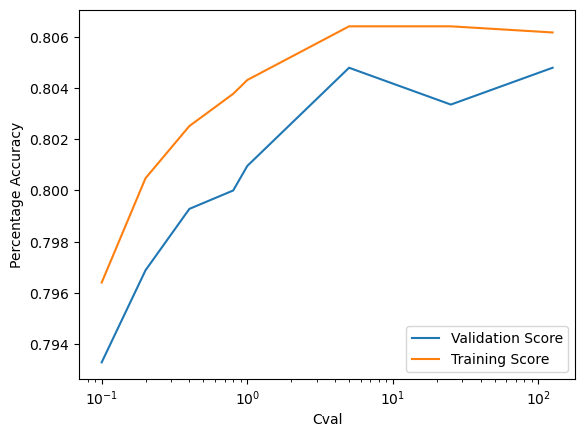

In [27]:
plt.plot(cVal, spamAverageValScoreList, label = "Validation Score")
plt.plot(cVal, spamAverageTrainScoreList, label = "Training Score")
plt.legend(loc='lower right')
plt.xlabel("Cval")
plt.ylabel("Percentage Accuracy")
plt.xscale("log")
plt.show()

It seems to be that C=25 has the best score.

Start of Question 7

In [71]:
#minst test
minstFinal= svm.SVC(kernel="rbf", C = 5, gamma="scale")
minstFinal.fit(minstTrainFlat, mnistTrainLabels)

predictedVal = minstFinal.predict(minstValFlat)
print("validation data score:", classAccuracy(predictedVal, mnistValLabels))

validation data score: 0.983
(10000, 1, 28, 28)


In [72]:
print(np.shape(mnistTest))
minstTestFlat = np.reshape(mnistTest, (10000, 784))
predictedMinstTest = minstFinal.predict(minstTestFlat)

(10000, 1, 28, 28)


In [95]:
import pandas as pd
list = [*range(1, len(minstTestFlat)+1)]
outputDict = {"Id":list, "Category": predictedMinstTest}

df = pd.DataFrame(outputDict)
df.to_csv('minstResult.csv', index=False)

In [30]:
spamFinal = svm.SVC(kernel= "linear", C = 25)#kernel="rbf", C = 10000)#, kernel= "linear", C = 25)
spamFinal.fit(spamTrainData, spamTrainLabels)

predictedVal = spamFinal.predict(spamValData)
print("validation data score:", classAccuracy(predictedVal, spamValLabels))

predictedSpamTest = spamFinal.predict(spamTest)

validation data score: 0.9220623501199041


In [16]:
import pandas as pd
list = [*range(1, len(spamTest)+1)]
outputDict = {"Id":list, "Category": predictedSpamTest}
df = pd.DataFrame(outputDict)
df.to_csv('spamResult.csv', index=False)